# <center><u>Healthcare</u></center>
## Project 2 

### >DESCRIPTION

#### Problem Statement
NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.
The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
Build a model to accurately predict whether the patients in the dataset have diabetes or not.
Dataset Description
The datasets consists of several medical predictor variables and one target variable (Outcome). Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and more.

 

#### Variables	Description
Pregnancies -	Number of times pregnant
Glucose - Plasma glucose concentration in an oral glucose tolerance test
BloodPressure - Diastolic blood pressure (mm Hg)
SkinThickness - Triceps skinfold thickness (mm)
Insulin -	Two hour serum insulin
BMI -	Body Mass Index
DiabetesPedigreeFunction - Diabetes pedigree function
Age -	Age in years
Outcome -	Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0

### >Project Task: Week 1
#### Data Exploration:

1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

• Glucose

• BloodPressure

• SkinThickness

• Insulin

• BMI

2. Visually explore these variables using histograms. Treat the missing values accordingly.

3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

### >Project Task: Week 2
#### Data Exploration:

1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

3. Perform correlation analysis. Visually explore it using a heat map.

 

### >Project Task: Week 3
#### Data Modeling:

1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

 

### >Project Task: Week 4
#### Data Modeling:

1. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.

#### Data Reporting:(its in Tableau)

2. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

a. Pie chart to describe the diabetic or non-diabetic population

b. Scatter charts between relevant variables to analyze the relationships

c. Histogram or frequency charts to analyze the distribution of the data

d. Heatmap of correlation analysis among the relevant variables

e. Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.

 
### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Reading Data From Csv file

In [2]:
df=pd.read_csv("health care diabetes.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### <center><u>PROJECT TASK WEEK 1:</u></center>
### <u>Performing EDA</u>
#### Looking for Null Value

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Looking for irrelevant Zeroand negative Values

In [5]:
(((df[df.columns]<=0).sum())/df.shape[0])*100

Pregnancies                 14.453125
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                     65.104167
dtype: float64

#### Examining Data Types

In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
#As the dtype cannot be float so lets make them integer type
df['Pregnancies']=df['Pregnancies'].astype('int32')
df['Outcome']=df['Outcome'].astype('int32')

#### Ploting Distribution plot for variable with null or irrelevant zero values

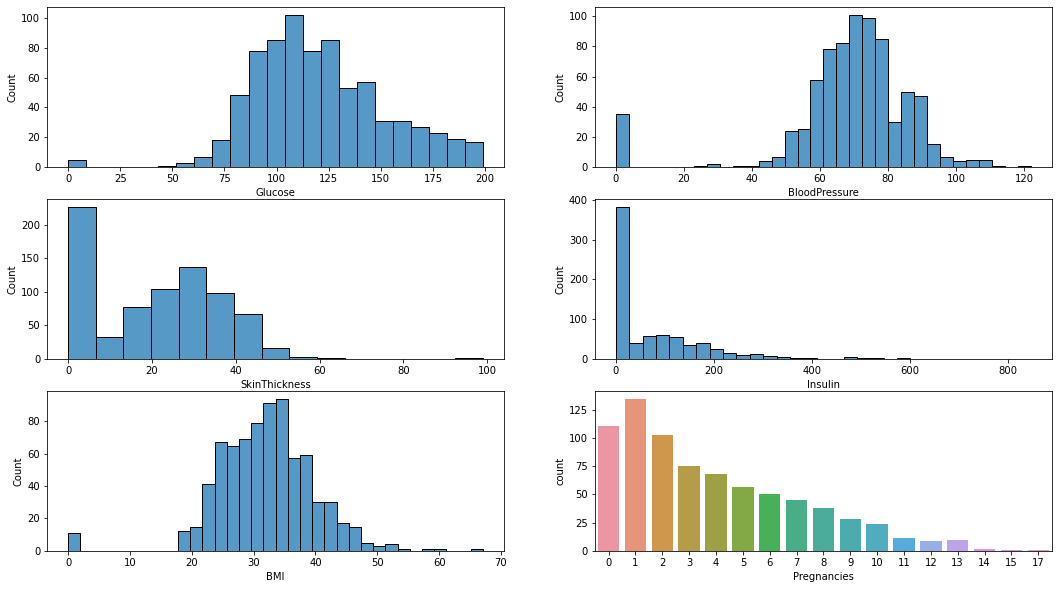

In [8]:
def axl():
    fig,ax=plt.subplots(3,2,figsize=(18,10))
    sns.histplot(df,x='Glucose',ax=ax[0,0])
    sns.histplot(df,x='BloodPressure',ax=ax[0,1])
    sns.histplot(df,x='SkinThickness',ax=ax[1,0])
    sns.histplot(df,x='Insulin',ax=ax[1,1])
    sns.histplot(df,x='BMI',ax=ax[2,0])
    sns.countplot(data=df,x='Pregnancies',ax=ax[2,1])
    fig.show()
    
axl()

#### From above graps its clear that zero is having low frequency in BMI and glucose whereas the other are having quite high values hence these rows cant be droppped
#### Making Irrelevant Zero values to Null

In [9]:
listfornan=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for i in listfornan:
    df.loc[df[i]==0,i]=np.nan

In [10]:
df.dtypes

Pregnancies                   int32
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int32
dtype: object

In [11]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Cheaking Correlation of varible with target and eliminating small and irrelevant values

<AxesSubplot:>

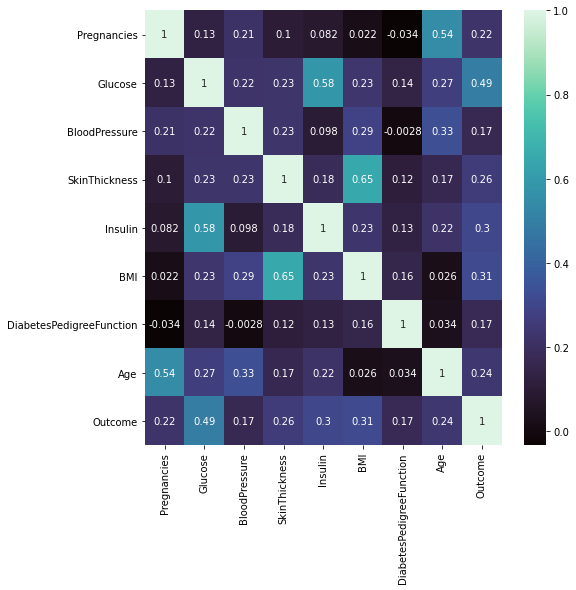

In [13]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap='mako')

In [14]:
#changing the nan to mean as they are correlated to outcome and are of amount less than 50 % and more than 2% of 
#total data thats why it cant be droped Because it will cause data Loss.

for j in ['SkinThickness','Insulin','BloodPressure'] :
    temp = df[j].mean()
    df.loc[df[j].isna(),j]=temp
df.shape

(768, 9)

In [15]:
#Droping the small amount of missing value rows i.e. less than 2% of total data
df.dropna(inplace=True)
df.shape

(752, 9)

### Examining Distribution graphs and Stats of variables

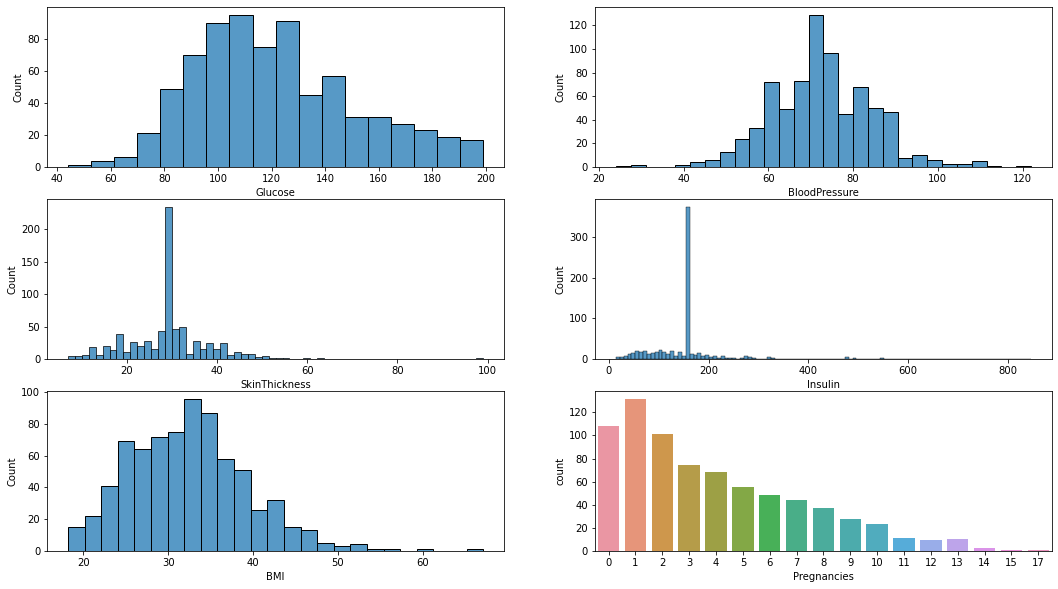

In [16]:
axl()

In [17]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000
mean,3.851064,121.941489,72.400725,29.166816,155.812979,32.454654,0.473051,33.312500,0.351064
std,3.375189,30.601198,12.146895,8.852107,85.750988,6.928926,0.330108,11.709395,0.477621
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,120.000000,27.500000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.153420,155.548223,32.300000,0.377000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,155.548223,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### <center><u>PROJECT TASK WEEK 2:</u></center>
### Cheaking if the data is imbalance or Not

<AxesSubplot:xlabel='Outcome', ylabel='count'>

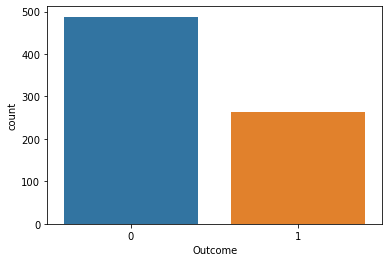

In [18]:
sns.countplot(data=df,x='Outcome')

In [19]:
(((df[df.columns]==0).sum())/df.shape[0])*100

Pregnancies                 14.361702
Glucose                      0.000000
BloodPressure                0.000000
SkinThickness                0.000000
Insulin                      0.000000
BMI                          0.000000
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                     64.893617
dtype: float64

### Examining the correlation between Predictor and Taget Variable('Outcome')

<AxesSubplot:>

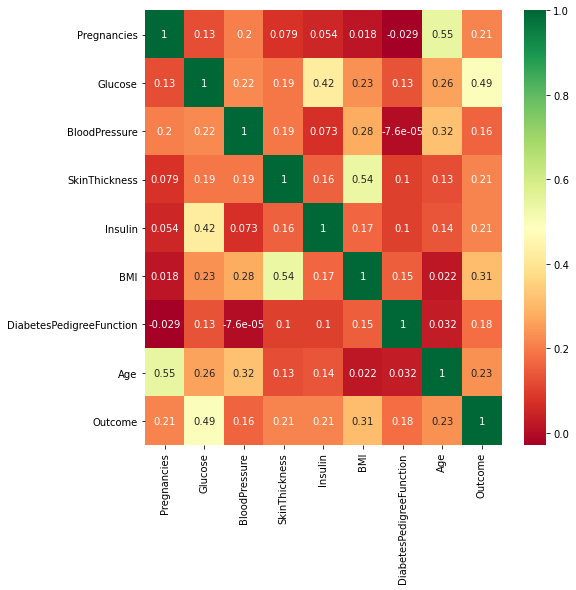

In [20]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

#### From the above heatmap we can see that the varibles Glucose and BMI are highly correlated to Outcome followed by the Age then (Pregnencies,Skinthickness,Insulin) and then DiabetesPedigreeFunction and finally BloodPressure

In [21]:
#cheaking percentage of outliers in "Insulin" Variable
(df[df['Insulin']>200].shape[0]/df.shape[0])*100

11.303191489361703

### Creating Pair plot to see the relationship betweent variables

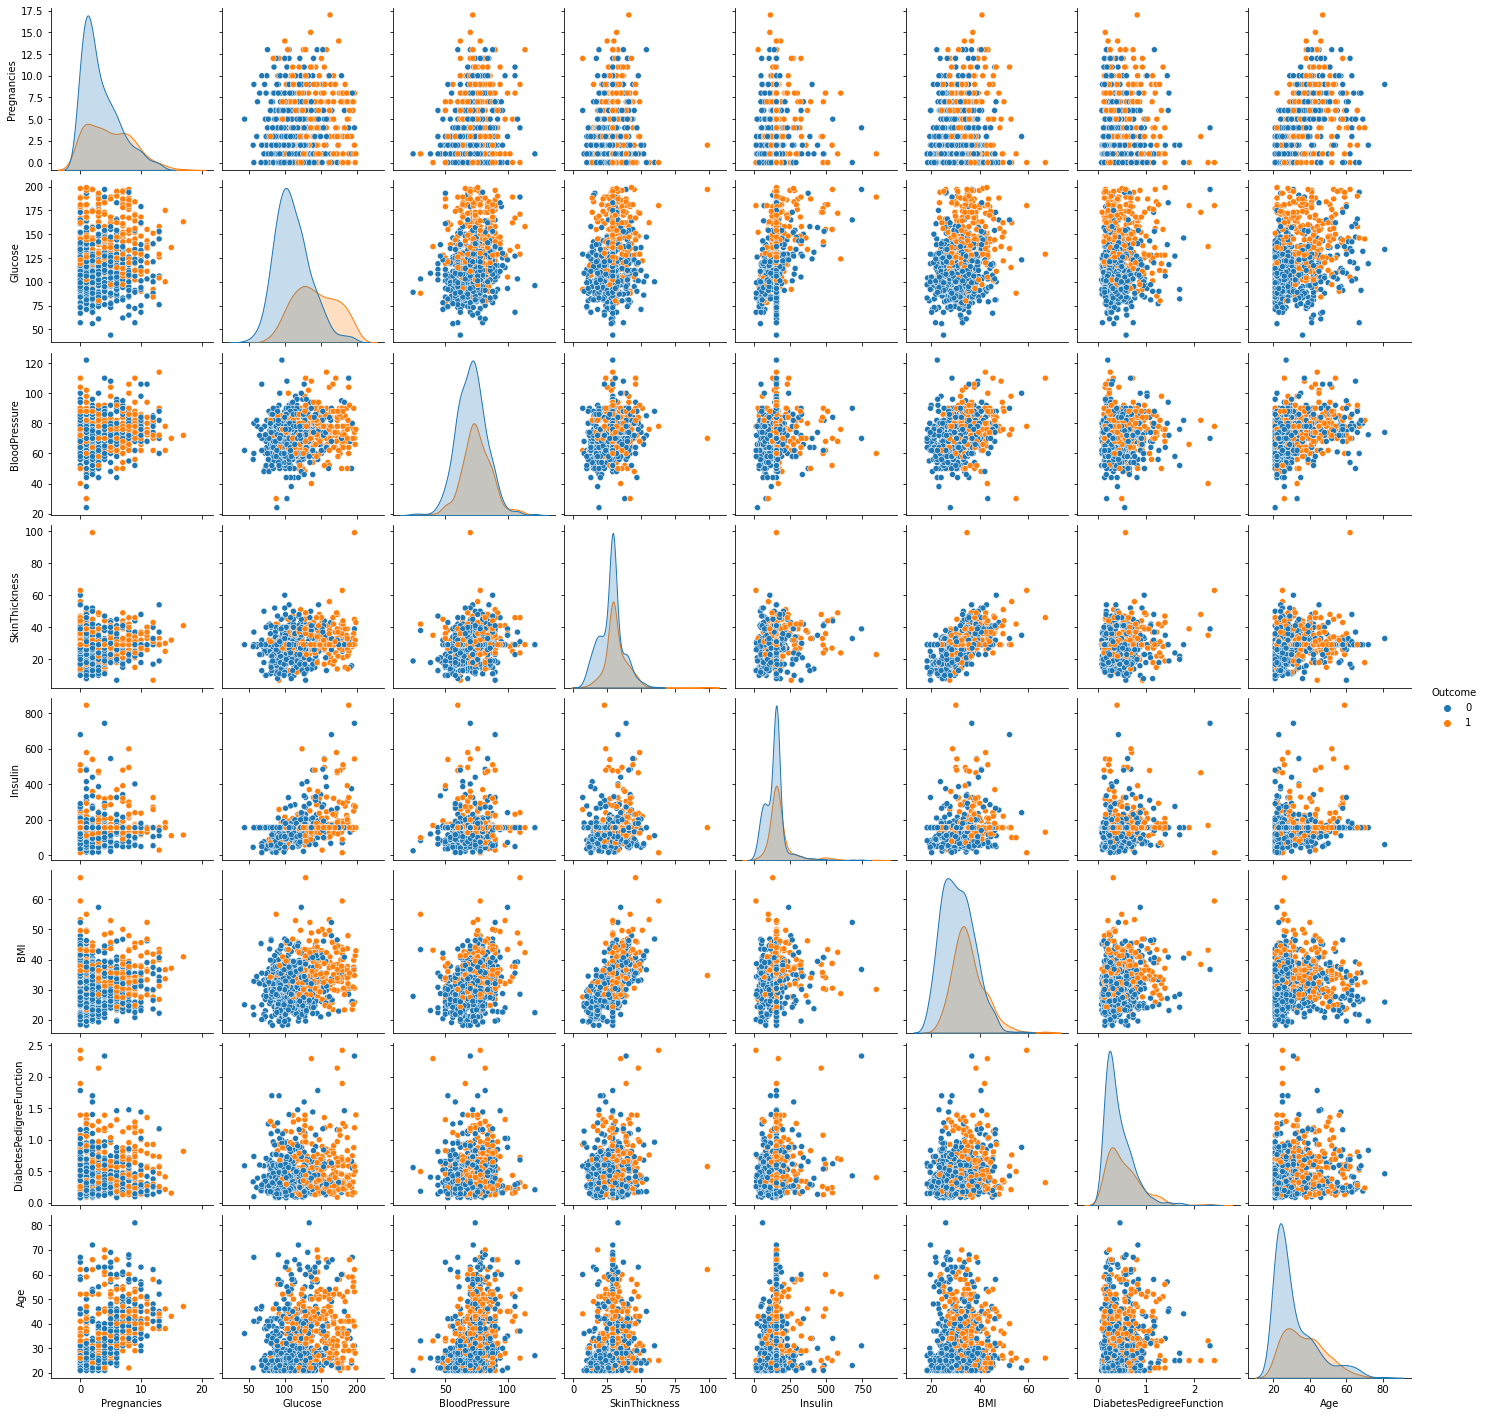

In [22]:
sns.pairplot(df,hue='Outcome')

#### As we can see there is no vairable pair that can completely seprate outcomes so we kow thats there are many variable pair that are interrelated. also all the varibles are not normally distributed for both of the outcomes.
### <center><u>PROJECT TASK WEEK 3:</u></center>
### Seprating target and Predictor variables

In [23]:
df_y=df['Outcome']
df_x=df.drop(columns='Outcome')

In [24]:
df_x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47


In [25]:
df_y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 752, dtype: int32

### Cheaking Predictor Variables for multicollinearity

In [26]:
import statsmodels.api as sm

In [27]:
logm1=sm.GLM(df_y,(sm.add_constant(df_x)),family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  752
Model:                            GLM   Df Residuals:                      743
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -350.82
Date:                Mon, 29 Nov 2021   Deviance:                       701.63
Time:                        15:58:11   Pearson chi2:                     730.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -8.9917      0.814    -11.049      0.000     -10.587      -7.397
Pregnancies                  0.1168      0.033      3.589      0.000       0.053       0.181
Glucose                      0.0373      0.004      9.603      0.000       0.030       0.045
BloodPressure               -0.0093      0.009     -1.080      0.280      -0.026       0.008
SkinThickness                0.0029      0.013      0.218      0.827      -0.023       0.029
Insulin                     -0.0008      0.001     -0.708      0.479      -0.003       0.001
BMI                          0.0915      0.018      5.136      0.000       0.057       0.126
DiabetesPedigreeFunction     0.9178      0.302      3.037      0.002       0.325       1.510
Age                          0.0138      0.010      1.427      0.154      -0.005       0.033
============================================================================================
"""

In [28]:
logm1=sm.GLM(df_y,(sm.add_constant(df_x.drop(columns=['BloodPressure','SkinThickness','Insulin','Age']))),family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  752
Model:                            GLM   Df Residuals:                      747
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -352.36
Date:                Mon, 29 Nov 2021   Deviance:                       704.72
Time:                        15:58:11   Pearson chi2:                     756.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -9.0824      0.705    -12.885      0.000     -10.464      -7.701
Pregnancies                  0.1359      0.028      4.914      0.000       0.082       0.190
Glucose                      0.0368      0.003     10.528      0.000       0.030       0.044
BMI                          0.0862      0.015      5.867      0.000       0.057       0.115
DiabetesPedigreeFunction     0.9294      0.300      3.094      0.002       0.341       1.518
============================================================================================
"""

### Creating Train Test Data Split

In [29]:
coltodrop=['BloodPressure','SkinThickness','Insulin','Age']
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(df_x,df_y,test_size=0.3,random_state=0)

#creating traintest split without multicollinear vairables

train_xd=train_x.drop(columns=coltodrop)
test_xd=test_x.drop(columns=coltodrop)

### <center><u>PROJECT TASK WEEK 4:</u></center>
### Creating functions for Making DataFrames and filling It with Scores of the models

In [30]:
from sklearn import metrics as mat

In [31]:
def makedf():
    Scrdf=pd.DataFrame(columns=['ModelName','Accuracy','Precision','Recall','Val-Accuracy','Val-Precision','Val-Recall','F-Score','Val-F-Score','Best-Score','Best-Params'])
    Rcdf=pd.DataFrame(columns=['ModelName','fpr','tpr','threshold','aucscore'])
    return Scrdf,Rcdf

##### this is the function that calculates the Scores and fill it in the data frame created above. 

In [32]:
def ScoreandRoc(name,actual,pred,valactual,valpred,valproba,bscore,bparams,SDF,RDF):
    SDF=SDF.append({'ModelName':name,
                    'Accuracy':mat.accuracy_score(actual,pred),
                    'Precision':mat.precision_score(actual,pred),
                    'Recall':mat.recall_score(actual,pred),
                    'Val-Accuracy':mat.accuracy_score(valactual,valpred),
                    'Val-Precision':mat.precision_score(valactual,valpred),
                    'Val-Recall':mat.recall_score(valactual,valpred),
                    'F-Score':mat.f1_score(actual,pred),
                    'Val-F-Score':mat.f1_score(valactual,valpred),
                    'Best-Score':bscore,
                    'Best-Params':bparams},ignore_index=True)
                    
    fpr,tpr,threshold=mat.roc_curve(valactual,valproba)
    RDF=RDF.append({'ModelName':name,
                  'fpr':fpr,
                  'tpr':tpr,
                  'threshold':threshold,
                  'aucscore':mat.roc_auc_score(valactual,valproba)},ignore_index=True)
    return SDF,RDF

### Function for Plotting the Roc-Auc Curve

In [33]:
def RocPlot(rocdf): 
    plt.figure(figsize=(8,8))
    for i in range(rocdf.shape[0]):
        plt.plot(rocdf.loc[i,'fpr'],rocdf.loc[i,'tpr'],label='{0} Auc={1:0.2f}'.format(rocdf.loc[i,'ModelName'],rocdf.loc[i,'aucscore']))

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curves from the investigated models')
    plt.legend(loc='best')
    plt.show()

### Hyperparameter Tunning Function

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
def HyperParameterTunning(Name,model,Train_X,Train_Y,Test_X,Test_Y,SDF,RDF):
    for mname in Name:
        grid_result=GridSearchCV(model[mname],param_grid[mname],scoring='f1',cv=3,n_jobs=-1,verbose=2)
        grid_result.fit(Train_X,Train_Y)
        SDF,RDF=ScoreandRoc(mname,Train_Y,grid_result.predict(Train_X),Test_Y,grid_result.predict(Test_X),grid_result.predict_proba(Test_X)[:,1],grid_result.best_score_,grid_result.best_params_,SDF,RDF)
    return SDF,RDF

## <u>Models Building</u>

In [36]:
model={}
param_grid={}

#### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

model["LogisticRegr"]=LogisticRegression()
param_grid["LogisticRegr"]={"solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],"penalty":['l1','l2']}

#### Support Vector Classifier

In [38]:
from sklearn.svm import SVC

model["SVClassifier"]=SVC(probability=True)
param_grid["SVClassifier"]={"kernel":['linear', 'poly', 'rbf', 'sigmoid'],"degree":[3,4,5,6]}

#### Gaussian Naive-Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB

model["GaussianNB"]=GaussianNB()
param_grid["GaussianNB"]={"var_smoothing":[1e-9,1e-8,1e-7,1e-6]}


#### DecisionTree

In [40]:
from sklearn.tree import DecisionTreeClassifier

model["DecisionTree"]=DecisionTreeClassifier()
param_grid["DecisionTree"]={"max_leaf_nodes":[2,5,8],"max_depth":[2,3,4,5],"criterion":['gini', 'entropy']}

#### K-Nearest-Neighbor

In [41]:
from sklearn.neighbors import KNeighborsClassifier

model["KNNeighbor"]=KNeighborsClassifier()
param_grid["KNNeighbor"]={"n_neighbors":[3,5,7,10,12],"metric":["minkowski","euclidean","manhattan"]}

#### Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

model["RandomForest"]=RandomForestClassifier()
param_grid["RandomForest"]={"criterion":["gini", "entropy"],"max_depth":[1,2,3,4],"n_estimators":[50,100,150,200]}


#### ADABoost Classifier

In [43]:
from sklearn.ensemble import AdaBoostClassifier

model["ADABoost"]=AdaBoostClassifier()
param_grid["ADABoost"]={"learning_rate":[0.01,0.3,0.05,0.1,0.15,0.2],"algorithm":['SAMME', 'SAMME.R'],"n_estimators":[50,75,100,150]}

#### XGBoost Classifier

In [44]:
import xgboost as xgb
from xgboost import XGBClassifier

model["XGBoost"]=XGBClassifier()
param_grid["XGBoost"]={"learning_rate":[0.01,0.05,0.07,0.1,0.15,0.2],"n_estimators":[50,75,100,150],"max_depth":[1,2,3,4,]}

### Fitting and hyperparamter tuning the model with crossvalidation and recording Scores

In [45]:
Scoredf,Rocdf=makedf()
Names=model.keys()
Scoredf,Rocdf=HyperParameterTunning(Names,model,train_x,train_y,test_x,test_y,Scoredf,Rocdf)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Fitting 3 folds for each of 15 candidates, totalling 45 fits
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Fitting 3 folds for each of 96 candidates, totalling 288 fits
[16:01:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### Cheaking all Scores For comparing Models

In [46]:
Scoredf

,ModelName,Accuracy,Precision,Recall,Val-Accuracy,Val-Precision,Val-Recall,F-Score,Val-F-Score,Best-Score,Best-Params
0,LogisticRegr,0.768061,0.733333,0.572917,0.796460,0.691176,0.652778,0.643275,0.671429,0.621744,"{'penalty': 'l2', 'solver': 'newton-cg'}"
1,SVClassifier,0.756654,0.719178,0.546875,0.796460,0.696970,0.638889,0.621302,0.666667,0.598924,"{'degree': 3, 'kernel': 'linear'}"
2,GaussianNB,0.756654,0.690476,0.604167,0.734513,0.578947,0.611111,0.644444,0.594595,0.637223,{'var_smoothing': 1e-06}
3,DecisionTree,0.788973,0.691943,0.760417,0.738938,0.567010,0.763889,0.724566,0.650888,0.649719,"{'criterion': 'gini', 'max_depth': 5, 'max_lea..."
4,KNNeighbor,0.790875,0.750000,0.640625,0.721239,0.558442,0.597222,0.691011,0.577181,0.650884,"{'metric': 'minkowski', 'n_neighbors': 12}"
5,RandomForest,0.825095,0.824675,0.661458,0.783186,0.694915,0.569444,0.734104,0.625954,0.628584,"{'criterion': 'entropy', 'max_depth': 4, 'n_es..."
6,ADABoost,0.838403,0.816568,0.718750,0.761062,0.618421,0.652778,0.764543,0.635135,0.642449,"{'algorithm': 'SAMME.R', 'learning_rate': 0.2,..."
7,XGBoost,0.840304,0.817647,0.723958,0.774336,0.636364,0.680556,0.767956,0.657718,0.677232,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est..."


### Comparing Roc-Auc Curves of Models

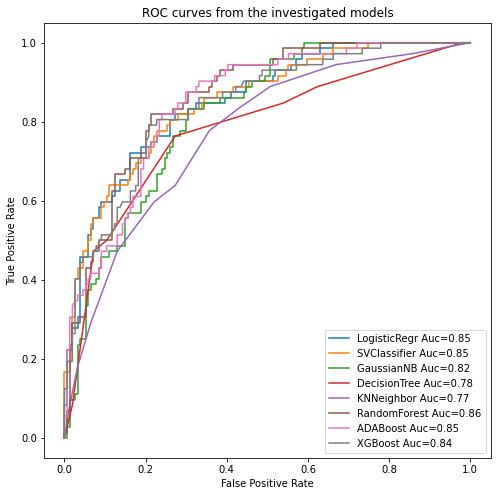

In [47]:
RocPlot(Rocdf)

#### As we can clearly see the Random Forest is having largest Auc value and Xgboost have highest Best-score but the LogisticRegression have highest validation or Test Score. Thus this can be used. where as <u>RandomForest</u> is best for classification As it have highest AUC Score

### Let's Cheak how this model performs with data without multicollinear Variables

In [48]:
Scoredf2,Rocdf2=makedf()
Scoredf2,Rocdf2=HyperParameterTunning(Names,model,train_xd,train_y,test_xd,test_y,Scoredf2,Rocdf2)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Fitting 3 folds for each of 15 candidates, totalling 45 fits
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Fitting 3 folds for each of 96 candidates, totalling 288 fits
[16:04:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [49]:
Scoredf2

,ModelName,Accuracy,Precision,Recall,Val-Accuracy,Val-Precision,Val-Recall,F-Score,Val-F-Score,Best-Score,Best-Params
0,LogisticRegr,0.758555,0.721088,0.552083,0.800885,0.701493,0.652778,0.625369,0.676259,0.620343,"{'penalty': 'l2', 'solver': 'newton-cg'}"
1,SVClassifier,0.756654,0.725352,0.536458,0.792035,0.692308,0.625000,0.616766,0.656934,0.609946,"{'degree': 3, 'kernel': 'linear'}"
2,GaussianNB,0.762357,0.710692,0.588542,0.778761,0.657143,0.638889,0.643875,0.647887,0.646192,{'var_smoothing': 1e-09}
3,DecisionTree,0.785171,0.816000,0.531250,0.769912,0.692308,0.500000,0.643533,0.580645,0.635913,"{'criterion': 'gini', 'max_depth': 5, 'max_lea..."
4,KNNeighbor,0.796578,0.751479,0.661458,0.761062,0.621622,0.638889,0.703601,0.630137,0.598052,"{'metric': 'manhattan', 'n_neighbors': 5}"
5,RandomForest,0.828897,0.810976,0.692708,0.800885,0.695652,0.666667,0.747191,0.680851,0.634606,"{'criterion': 'gini', 'max_depth': 4, 'n_estim..."
6,ADABoost,0.819392,0.797546,0.677083,0.769912,0.651515,0.597222,0.732394,0.623188,0.644431,"{'algorithm': 'SAMME.R', 'learning_rate': 0.3,..."
7,XGBoost,0.849810,0.819209,0.755208,0.796460,0.675676,0.694444,0.785908,0.684932,0.660562,"{'learning_rate': 0.05, 'max_depth': 4, 'n_est..."


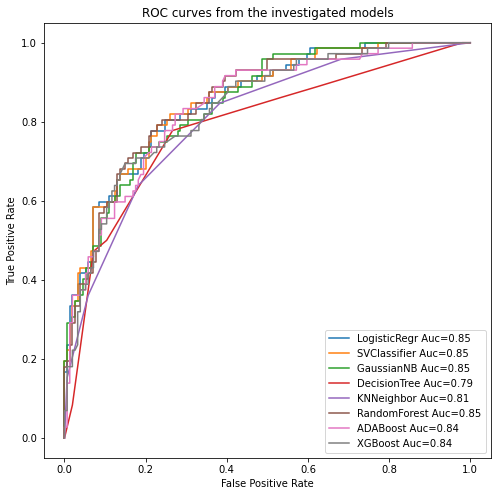

In [50]:
RocPlot(Rocdf2)

####  we can clearly see the Random Forest is having largest Auc value and Xgboost have highest Best-score And highest validation or test Score. Thus Random Forest and Xgboost is best for this scenarios.Though <u>Random Forest</u> have higher AUC-score so it should be used.

### For making Dashboard in Tableau let us export the Cleaned data

In [51]:
df.to_csv("health care diabetes Cleaned.csv")